In [1]:
import pandas as pd
import numpy as np

# Clustering & Metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For Visualizations
import matplotlib.pyplot as plt

In [2]:
# Load dataset (already uploaded)
df = pd.read_csv("Data/digital_marketing_campaign_dataset.csv")

In [3]:
for col_to_drop in ["CustomerID", "AdvertisingPlatform", "AdvertisingTool"]:
    if col_to_drop in df.columns:
        df.drop(columns=[col_to_drop], inplace=True)

In [4]:
print("DataFrame shape:", df.shape)
print(df.info())  # Columns, types, non-null counts
df.head()

DataFrame shape: (8000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


In [5]:
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

In [6]:
# Check transformations
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Income                        8000 non-null   int64  
 2   AdSpend                       8000 non-null   float64
 3   ClickThroughRate              8000 non-null   float64
 4   ConversionRate                8000 non-null   float64
 5   WebsiteVisits                 8000 non-null   int64  
 6   PagesPerVisit                 8000 non-null   float64
 7   TimeOnSite                    8000 non-null   float64
 8   SocialShares                  8000 non-null   int64  
 9   EmailOpens                    8000 non-null   int64  
 10  EmailClicks                   8000 non-null   int64  
 11  PreviousPurchases             8000 non-null   int64  
 12  LoyaltyPoints                 8000 non-null   int64  
 13  Con

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,False,False,False,False,False,True,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,True,True,False,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,False,False,True,False,False,False,True,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,False,False,True,False,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,False,False,True,False,False,False,False,False,True,False


In [7]:
# Confirm no more missing
print("Missing values after drop:", df.isna().sum().sum())

Missing values after drop: 0


In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Income                        8000 non-null   int64  
 2   AdSpend                       8000 non-null   float64
 3   ClickThroughRate              8000 non-null   float64
 4   ConversionRate                8000 non-null   float64
 5   WebsiteVisits                 8000 non-null   int64  
 6   PagesPerVisit                 8000 non-null   float64
 7   TimeOnSite                    8000 non-null   float64
 8   SocialShares                  8000 non-null   int64  
 9   EmailOpens                    8000 non-null   int64  
 10  EmailClicks                   8000 non-null   int64  
 11  PreviousPurchases             8000 non-null   int64  
 12  LoyaltyPoints                 8000 non-null   int64  
 13  Con

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,False,False,False,False,False,True,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,True,True,False,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,False,False,True,False,False,False,True,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,False,False,True,False,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,False,False,True,False,False,False,False,False,True,False


In [9]:
df_clean = df

In [10]:
# Use all variables from the cleaned DataFrame for clustering
X = df_clean.copy()

# If the DataFrame already has a 'Cluster' column (from previous runs), remove it:
if 'Cluster' in X.columns:
    X.drop(columns=['Cluster'], inplace=True)

print("Using all features for clustering:")
print(X.head())

Using all features for clustering:
   Age  Income      AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0   56  136912  6497.870068          0.043919        0.088031              0   
1   69   41760  3898.668606          0.155725        0.182725             42   
2   46   88456  1546.429596          0.277490        0.076423              2   
3   32   44085   539.525936          0.137611        0.088004             47   
4   60   83964  1678.043573          0.252851        0.109940              0   

   PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  ...  Gender_Male  \
0       2.399017    7.396803            19           6  ...        False   
1       2.917138    5.352549             5           2  ...         True   
2       8.223619   13.794901             0          11  ...        False   
3       4.540939   14.688363            89           2  ...        False   
4       2.046847   13.993370             6           6  ...        False   

   CampaignChannel_Email  C

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Define the range for PCA components (adjust based on your data's number of features)
pca_range = range(2, min(X_scaled.shape[1], 10) + 1)  # from 2 to either 10 or number of features

# Define k-range for K-Means
k_range = range(2, 11)

# Initialize variables to store the best configuration
overall_best_sil = -np.inf
best_pca_n = None
best_k_for_best = None
best_scores_for_best = None

In [13]:
# Loop over different numbers of PCA components
for n_components in pca_range:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components, random_state=42)
    X_pca_temp = pca.fit_transform(X_scaled)
    
    # Test K-Means for this PCA-transformed data
    scores_temp = []
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=42)
        labels_temp = kmeans_temp.fit_predict(X_pca_temp)
        sil = silhouette_score(X_pca_temp, labels_temp)
        scores_temp.append((k, sil))
    
    # Find the best silhouette score for this number of PCA components
    best_for_this = max(scores_temp, key=lambda x: x[1])
    
    # Check if this configuration is better than the overall best
    if best_for_this[1] > overall_best_sil:
        overall_best_sil = best_for_this[1]
        best_pca_n = n_components
        best_k_for_best = best_for_this[0]
        best_scores_for_best = scores_temp

In [14]:
# Print the best configuration found
print("Best number of PCA components:", best_pca_n)
print("Best k (clusters) for that PCA configuration:", best_k_for_best)
print("Overall best silhouette score:", overall_best_sil)

Best number of PCA components: 2
Best k (clusters) for that PCA configuration: 6
Overall best silhouette score: 0.6917106071593925


In [15]:
# For visualization, re-compute PCA with the best number of components
pca_best = PCA(n_components=best_pca_n, random_state=42)
X_pca_best = pca_best.fit_transform(X_scaled)

In [16]:
# Test K-Means silhouette scores on the best PCA configuration
scores_best = []
for k in k_range:
    kmeans_best = KMeans(n_clusters=k, random_state=42)
    labels_best = kmeans_best.fit_predict(X_pca_best)
    sil_best = silhouette_score(X_pca_best, labels_best)
    scores_best.append((k, sil_best))

In [17]:
# Extract values for plotting
ks_best = [item[0] for item in scores_best]
sil_values_best = [item[1] for item in scores_best]

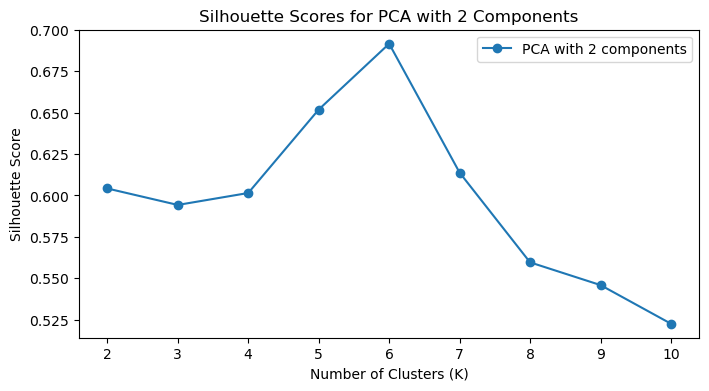

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(ks_best, sil_values_best, marker='o', label=f'PCA with {best_pca_n} components')
plt.title(f"Silhouette Scores for PCA with {best_pca_n} Components")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()